In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#print function for chart
%matplotlib inline

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# sk learn imports ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**First Data Set**

In [ ]:
# Loading the dataset
df1 = pd.read_csv("/content/Generation_Data.csv")

In [ ]:
df1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,15-05-2020 00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,15-05-2020 00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,15-05-2020 00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,15-05-2020 00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,17-06-2020 23:45,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,17-06-2020 23:45,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,17-06-2020 23:45,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,17-06-2020 23:45,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


**Second Data Set**

In [ ]:
# Loading the dataset
df2 = pd.read_csv("/content/Weather_Sensor_Data.csv")

In [ ]:
df2

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


In [ ]:
df1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,15-05-2020 00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,15-05-2020 00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,15-05-2020 00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,15-05-2020 00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [ ]:
df1.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
67693,17-06-2020 23:45,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0
67694,17-06-2020 23:45,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0
67695,17-06-2020 23:45,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0
67696,17-06-2020 23:45,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0
67697,17-06-2020 23:45,4136001,xoJJ8DcxJEcupym,0.0,0.0,4316.0,209335741.0


In [ ]:
df2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [ ]:
df2.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0
3258,2020-06-17 23:45:00,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0


In [ ]:
df1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


In [ ]:
df2.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


In [ ]:
df1.shape

(67698, 7)

In [ ]:
df2.shape

(3259, 6)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [ ]:
#gives any (5) random values
df1.sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
8809,19-05-2020 04:15,4136001,PeE6FRyGXUgsRhN,0.000000,0.000000,0.000000,1.348376e+09
59122,13-06-2020 22:30,4136001,IQ2d7wF4YD8zU1Q,0.000000,0.000000,3023.000000,2.016139e+07
54014,11-06-2020 12:30,4136001,4UPUqMRk7TRMgml,504.126667,494.480000,2008.000000,2.626298e+06
29200,30-05-2020 18:00,4136001,9kRcWv60rDACzjR,68.557143,66.407143,7964.714286,2.247832e+09
29731,31-05-2020 00:00,4136001,LYwnQax7tkwH5Cb,0.000000,0.000000,4662.600000,1.795040e+09


In [ ]:
df2.sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3002,2020-06-15 07:45:00,4136001,iq8k7ZNt4Mwm3w0,26.614361,31.780329,0.336786
555,2020-05-20 19:15:00,4136001,iq8k7ZNt4Mwm3w0,29.782119,27.898327,0.000000
3099,2020-06-16 08:00:00,4136001,iq8k7ZNt4Mwm3w0,25.998283,30.627215,0.245955
5,2020-05-15 01:15:00,4136001,iq8k7ZNt4Mwm3w0,26.512740,25.317970,0.000000
1875,2020-06-03 13:45:00,4136001,iq8k7ZNt4Mwm3w0,28.745618,36.349146,0.348509


In [ ]:
df1['DATE_TIME'] = pd.to_datetime(df1['DATE_TIME'])
df2['DATE_TIME'] = pd.to_datetime(df2['DATE_TIME'])

<ipython-input-19-56b34c67337d>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['DATE_TIME'] = pd.to_datetime(df1['DATE_TIME'])


In [ ]:
df_solar = pd.merge(df1.drop(columns = ['PLANT_ID']), df2.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
52086,2020-06-10 14:30:00,NgDl19wMapZy17u,408.566667,401.24,1815.933333,1.117101e+08,33.920901,43.073061,0.334423
32454,2020-06-01 07:00:00,4UPUqMRk7TRMgml,101.026667,98.16,66.133333,2.552625e+06,24.567252,26.587057,0.064624
49416,2020-06-09 08:15:00,4UPUqMRk7TRMgml,539.780000,529.22,656.933333,2.611258e+06,26.879663,33.533331,0.417063
40550,2020-06-05 03:30:00,4UPUqMRk7TRMgml,0.000000,0.00,6990.000000,2.577404e+06,23.204862,22.075747,0.000000
33606,2020-06-01 20:15:00,NgDl19wMapZy17u,0.000000,0.00,4117.000000,1.116488e+08,23.221523,22.955967,0.000000


In [ ]:
df_solar.shape

(67698, 9)

In [ ]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.6+ MB


In [ ]:
df_solar.isnull().sum()

,0
DATE_TIME,0
SOURCE_KEY,0
DC_POWER,0
AC_POWER,0
DAILY_YIELD,0
TOTAL_YIELD,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
IRRADIATION,0


In [ ]:
df_solar.describe().style.background_gradient(cmap='Blues')

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,67698,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,2020-06-01 10:44:33.650625024,246.701961,241.277825,3294.890295,658944788.425164,27.986756,32.607233,0.229204
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000,20.942385,20.265123,0.000000
25%,2020-05-23 21:00:00,0.000000,0.000000,272.750000,19964944.870000,24.570349,23.685627,0.000000
50%,2020-06-01 23:00:00,0.000000,0.000000,2911.000000,282627587.000000,26.910352,27.433723,0.018554
75%,2020-06-09 23:30:00,446.591667,438.215000,5534.000000,1348495113.000000,30.912601,40.019036,0.431027
max,2020-06-17 23:45:00,1420.933333,1385.420000,9873.000000,2247916295.000000,39.181638,66.635953,1.098766
std,nan,370.569597,362.112118,2919.448386,729667771.074688,4.021294,11.226446,0.309365


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,0,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15,1,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15,2,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15,3,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15,4,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0


In [ ]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  int64         
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 4.6 MB


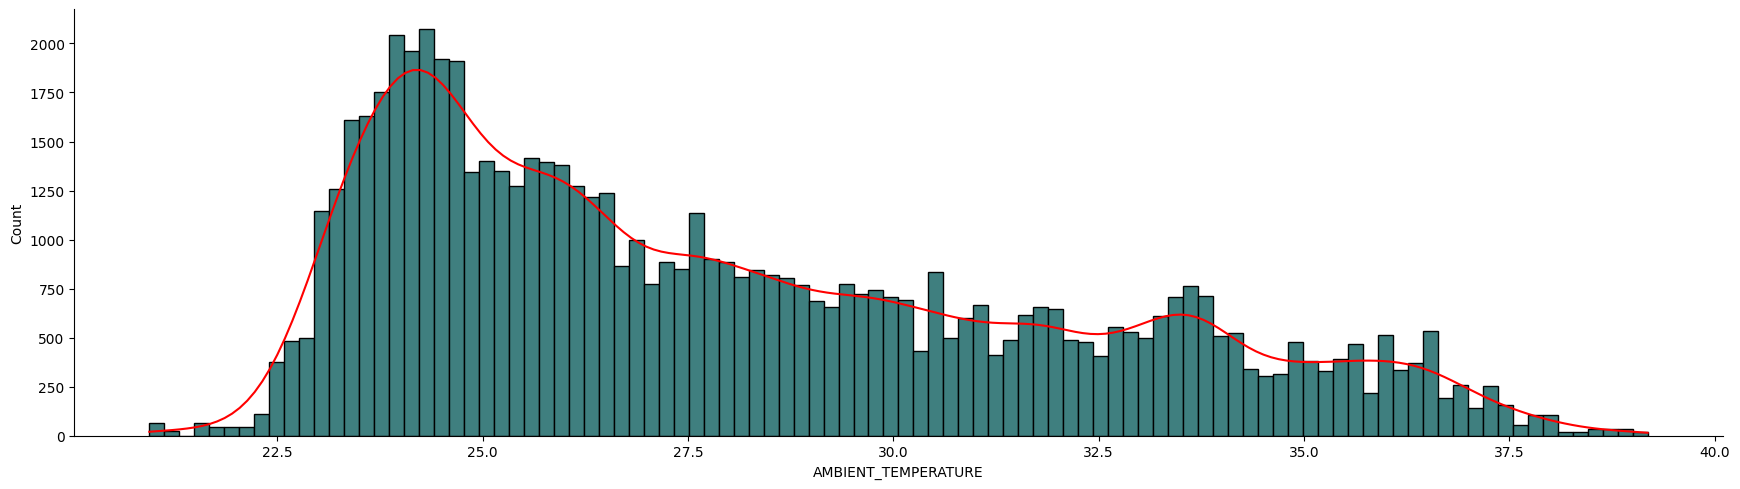

In [ ]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

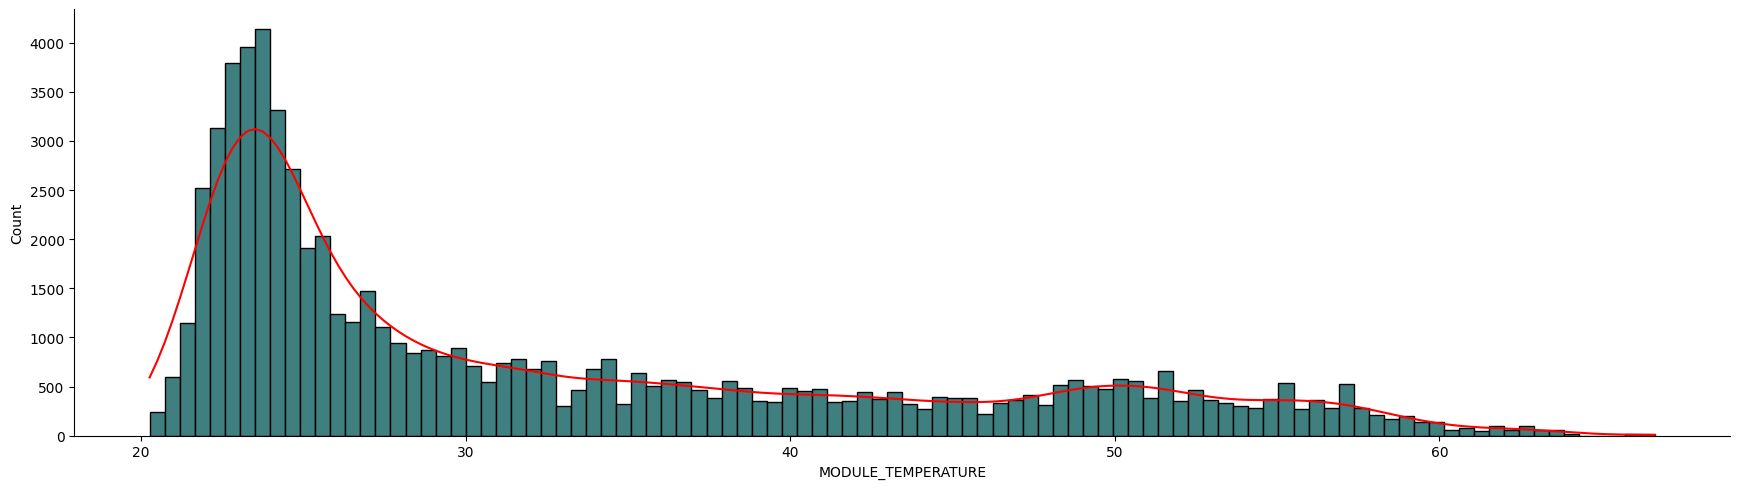

In [ ]:
sns.displot(data=df_solar, x="MODULE_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [ ]:
#Creating a copy of the dataset
df2 = df_solar.copy()
X = df2.drop('AC_POWER',axis=1)
y = df2['AC_POWER']

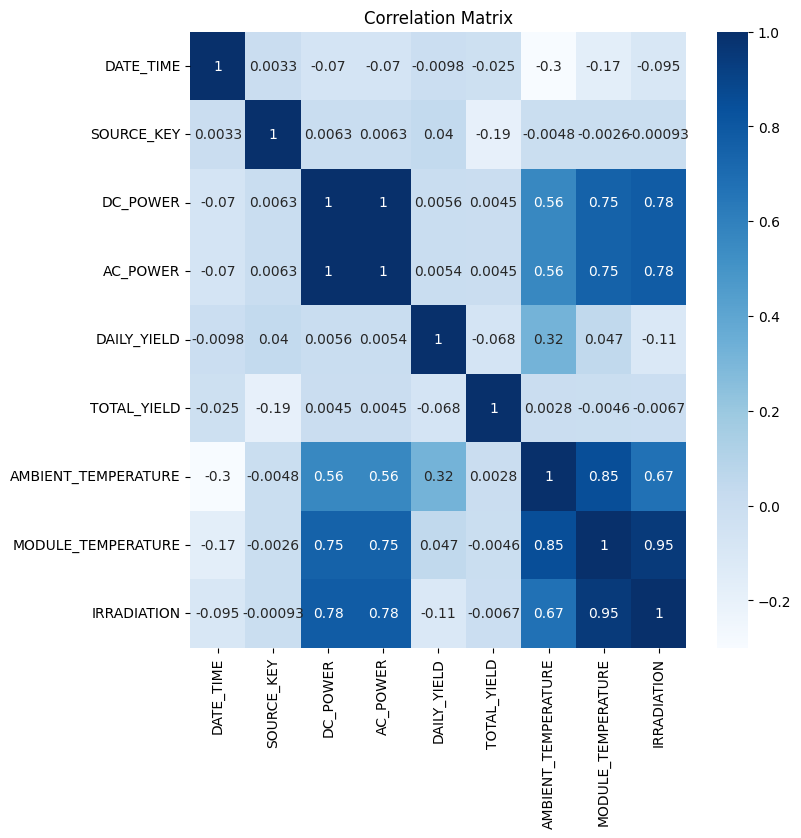

In [ ]:
# Plotting the correlation matrix "Heatmap"
plt.figure(figsize=(8, 8))

# Creating a heatmap of the correlation matrix
sns.heatmap(df_solar.corr(), annot=True, cmap='Blues')
# df.corr() calculates the correlation coefficients between numerical features
# annot=True adds the correlation values on the heatmap
# cmap='viridis' sets the color palette for the heatmap
# cmap= 'viridis', 'coolwarm', 'Blues', 'Greens', 'PiYG' etc

# Adding a title to the heatmap
plt.title('Correlation Matrix')

# Displaying the heatmap
plt.show()

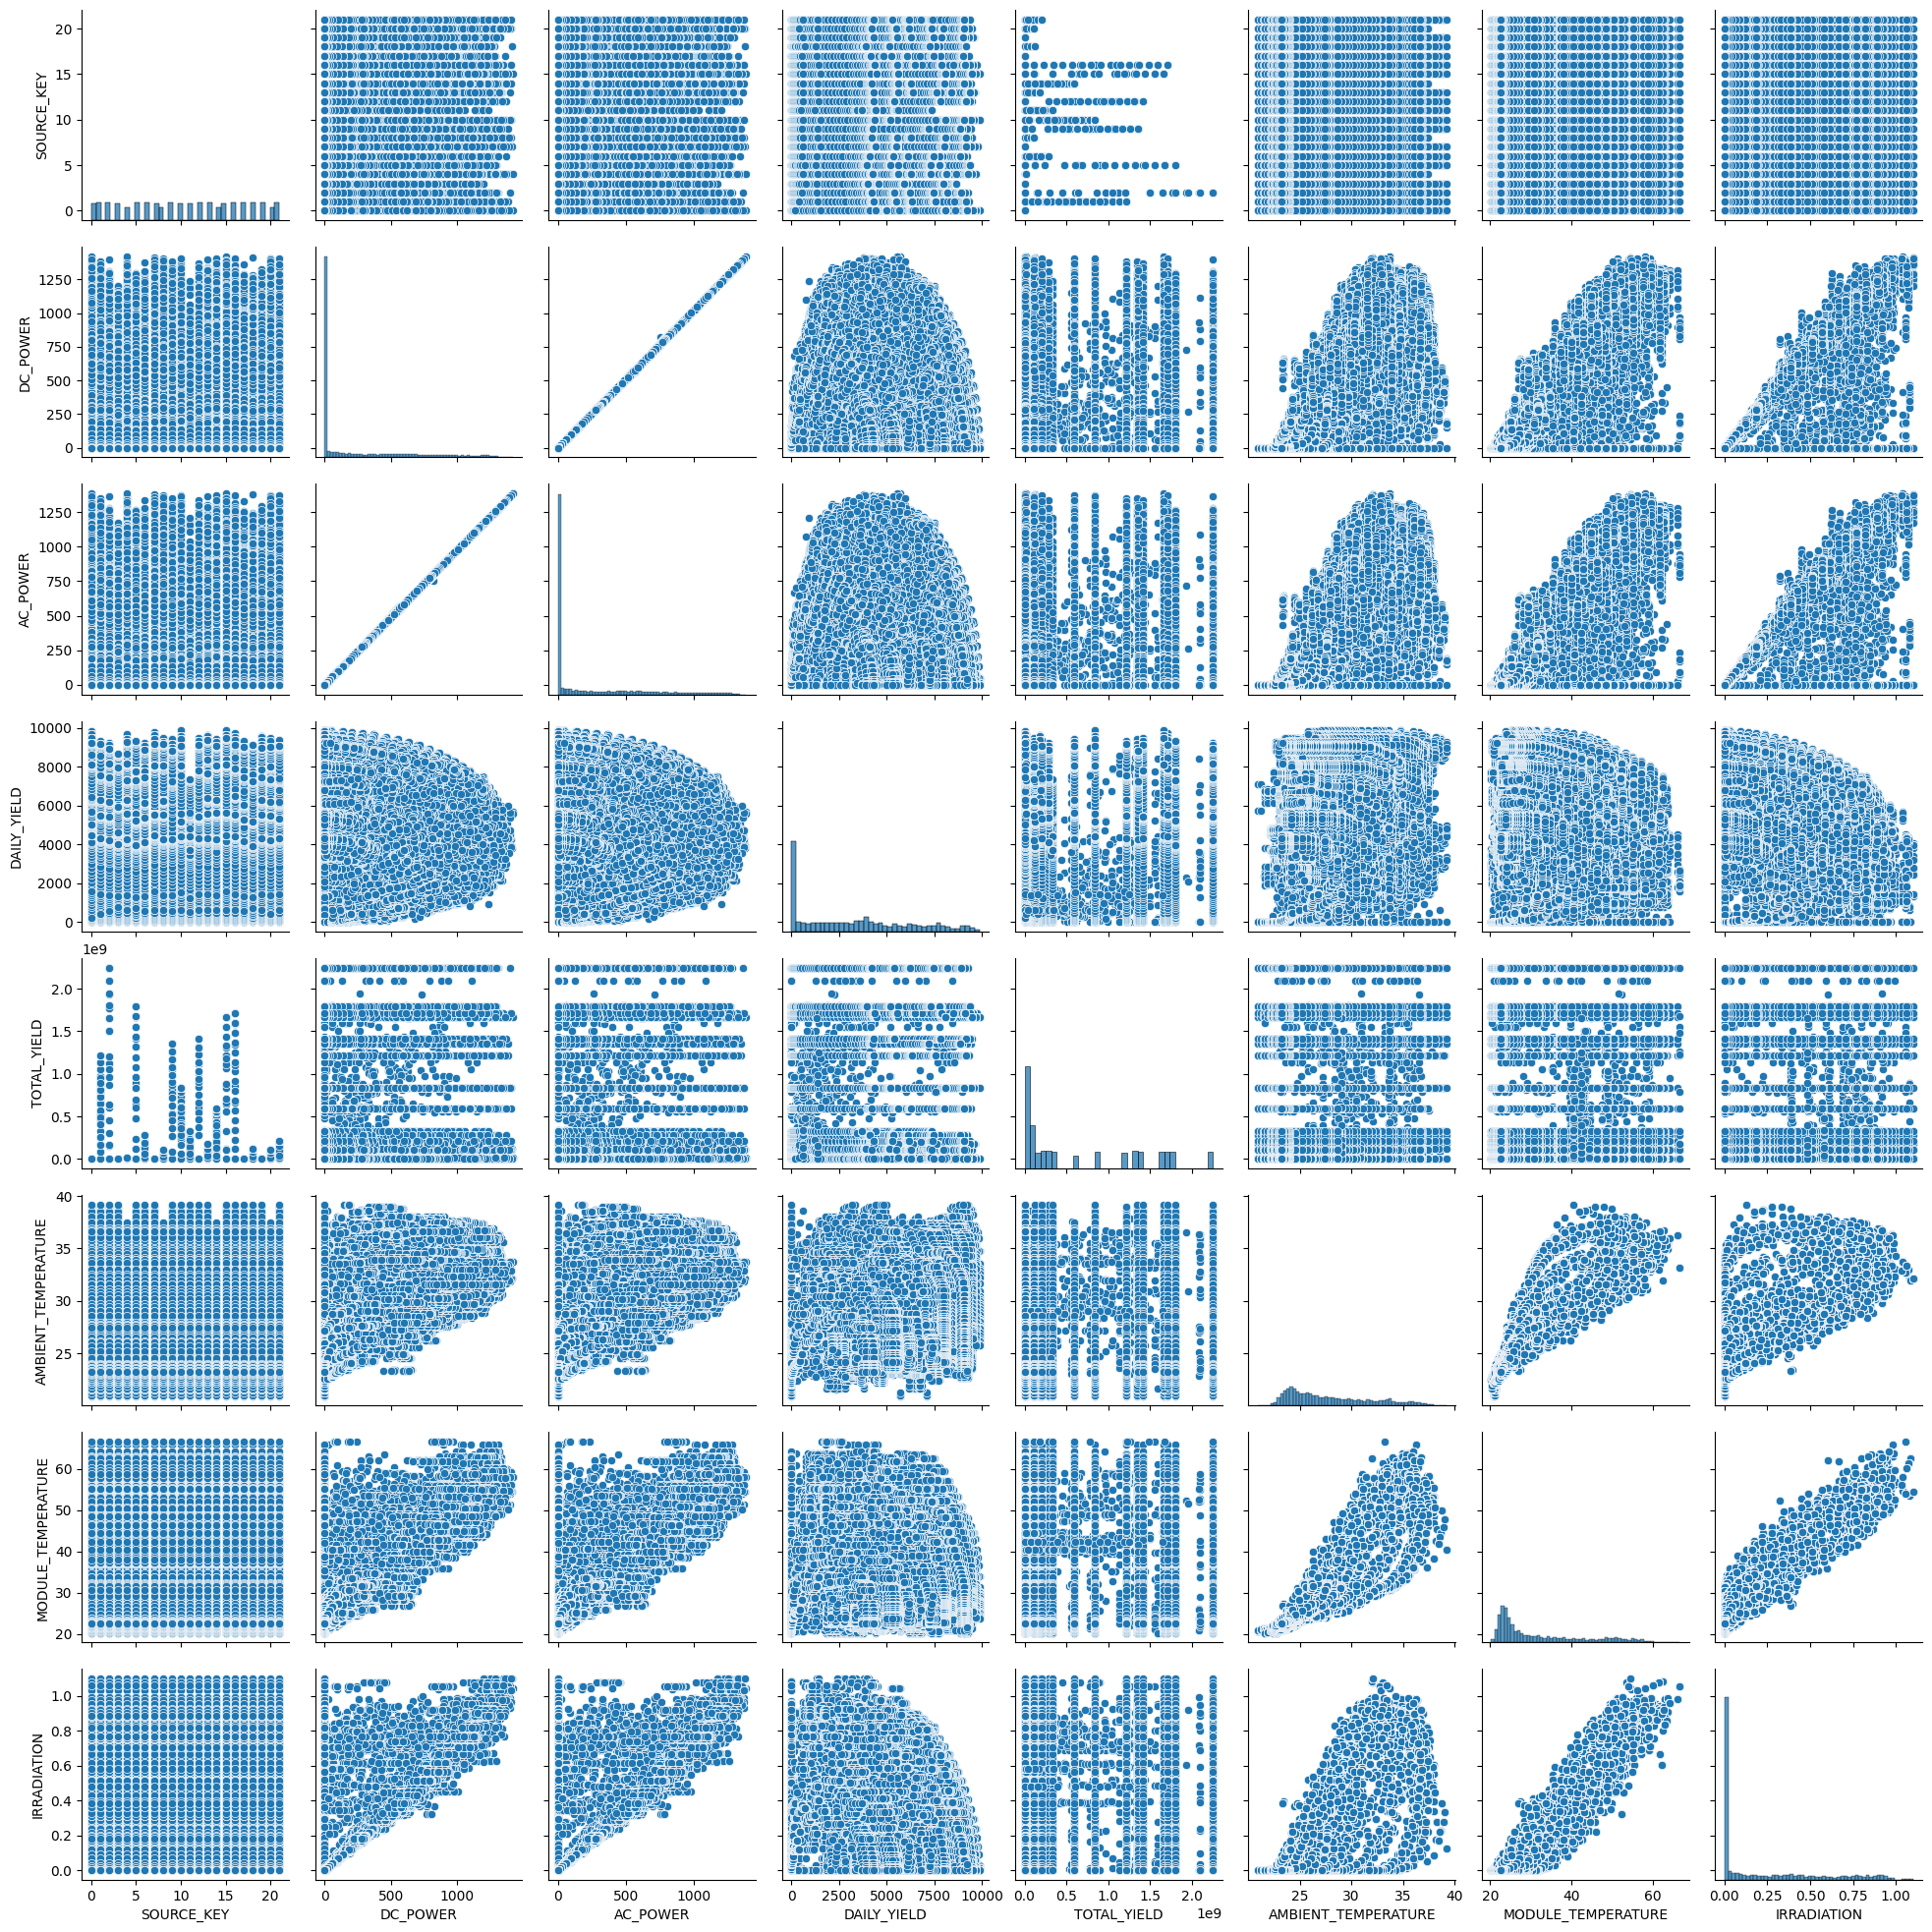

In [ ]:
#Pairpilot to visualize relationships between features

#Creating a pairplot for the entire Dataframe
sns.pairplot(df_solar)
#this will create scatterplots for each pair of features along with histograms for individual features

#Displaying the pairplot
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#initialize VIF dataframe
vif_data = pd.DataFrame()
# Selecting only numerical features for VIF calculation
numerical_features = X.select_dtypes(include=np.number).columns
vif_data["feature"] = numerical_features

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X[numerical_features].values, i)
                          for i in range(len(numerical_features))]

print(vif_data)

               feature         VIF
0           SOURCE_KEY    3.698580
1             DC_POWER    3.789678
2          DAILY_YIELD    2.765940
3          TOTAL_YIELD    1.885175
4  AMBIENT_TEMPERATURE  276.336636
5   MODULE_TEMPERATURE  435.604911
6          IRRADIATION   42.128265


In [ ]:
#Dropping the unnecessary features
X=df2.drop(['MODULE_TEMPERATURE','AC_POWER'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#initialize VIF dataframe
vif_data = pd.DataFrame()
# Selecting only numerical features for VIF calculation
numerical_features = X.select_dtypes(include=np.number).columns
vif_data["feature"] = numerical_features

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X[numerical_features].values, i)
                          for i in range(len(numerical_features))]

print(vif_data)

               feature       VIF
0           SOURCE_KEY  3.690741
1             DC_POWER  3.781541
2          DAILY_YIELD  2.752324
3          TOTAL_YIELD  1.883764
4  AMBIENT_TEMPERATURE  9.405705
5          IRRADIATION  4.579768


In [ ]:
#Dropping the unnecessary features
X=df2.drop(['AMBIENT_TEMPERATURE','AC_POWER', 'DATE_TIME', 'SOURCE_KEY','DC_POWER', 'DAILY_YIELD'],axis=1)

In [ ]:
X.columns

Index(['TOTAL_YIELD', 'MODULE_TEMPERATURE', 'IRRADIATION'], dtype='object')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TOTAL_YIELD         67698 non-null  float64
 1   MODULE_TEMPERATURE  67698 non-null  float64
 2   IRRADIATION         67698 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

LR Model score = 61.3170%
R2 Score :  36.73 %


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = dtr.predict(X_test)
R2_score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_score_dtr,"%")

R2 Score :  81.61 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [ ]:
# RandomForestRegressor mean cross-validation
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
cv = cross_val_score(rf, X_train, y_train, cv=5)
print('RandomForestRegressor')
print(mean(cv)*100)

RandomForestRegressor
87.37847286426803


In [ ]:
#GradientBoostingRegressor mean cross-validation
gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(X_train, y_train)
cv = cross_val_score(gbr, X_train, y_train, cv=5)
print('GradientBoostingRegressor')
print(mean(cv)*100)